# Exploring Relationships

## 01. Import Libraries
## 02. Create Correlation Heatmap
## 03. Create Scatterplots
## 04. Create Pair Plot
## 05. Create Categorical Plot
### A. Exploratory Analyses for Skew
### B. Investigate Zero Providers Group
### C. Investigate Non-Zero Providers Group


# 01. Import Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# define path
path = r'/Users/mindydong/Documents/Data Analyst/Achievement 6 /Medicare MSU/'

In [7]:
#import state aggregated data
df_qpp = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'state_agg.pkl'))

# 02. Create correlation heatmap

In [8]:
#create subset for number_ffs_members, number_of_providers, number of users, and total payment
subset = df_qpp[['number_ffs_members','number_of_providers','number_of_users',
       'total_payment']]

In [9]:
subset

,number_ffs_members,number_of_providers,number_of_users,total_payment
1,528819.0,149.0,74083.0,7.676008e+07
2,65846.0,32.0,6812.0,5.690912e+06
3,679296.0,176.0,66243.0,4.592878e+07
4,421631.0,89.0,53153.0,4.777772e+07
5,3228528.0,329.0,376202.0,3.354311e+08
...,...,...,...,...
987484,1185624.0,423.0,40978.0,8.991444e+06
987485,935054.0,435.0,26563.0,5.147131e+06
987486,261392.0,167.0,12511.0,1.994584e+06
987487,662694.0,134.0,11737.0,2.837753e+06


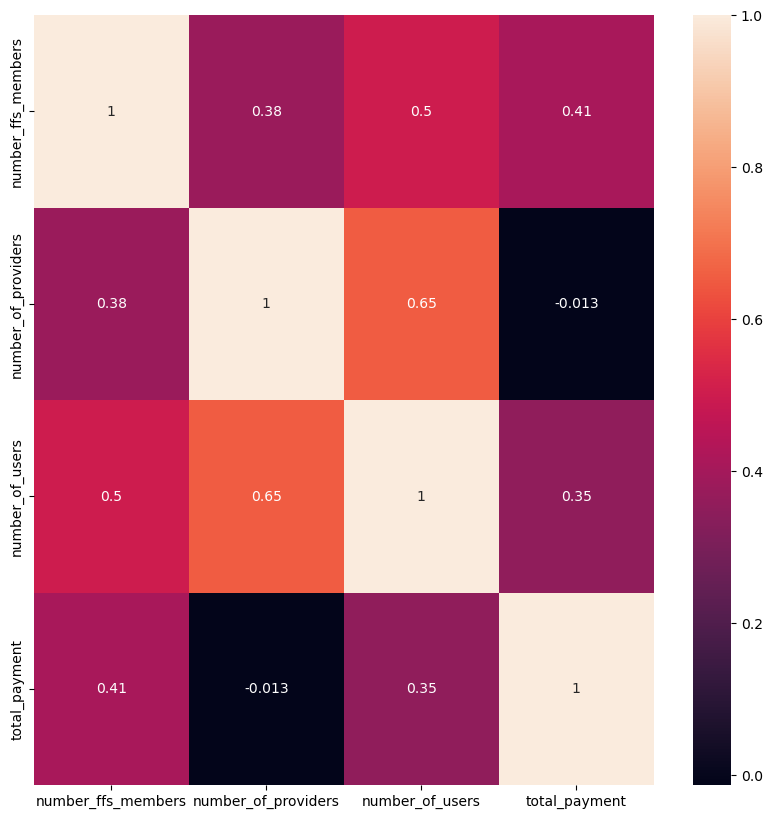

In [10]:
#create a subplot with matplotlib
fig, ax = plt.subplots(figsize = (10,10))

#create correlation heatmap
corr = sns.heatmap(subset.corr(), annot = True, ax=ax)

There is a stronger correlation between the number of providers and number of users. There is also a stronger correlation betwen the number of users and the number of FFS members (user means members that have had a paid claim for a service and a member is merely someone that is enrolled in a Medicare FFS plan).

In [11]:
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap.png'))

## 03. Create scatterplots

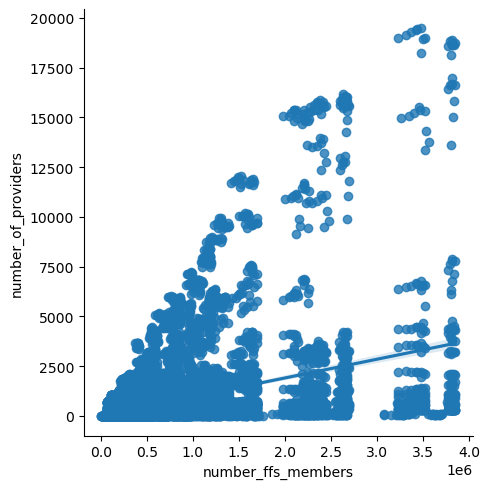

In [12]:
#create scatterplot for members vs number of providers
member_provider_scatter = sns.lmplot(x = 'number_ffs_members', y = 'number_of_providers', data = df_qpp)

It's interesting to see that it's clutered towards the lower end. There is a slightly positive correlation between number of ffs members and number of providers. It would've been concerning to see a small amount of members and a large amount of providers.

In [13]:
#export scatterplot
member_provider_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'member_provider_scatter.png'))

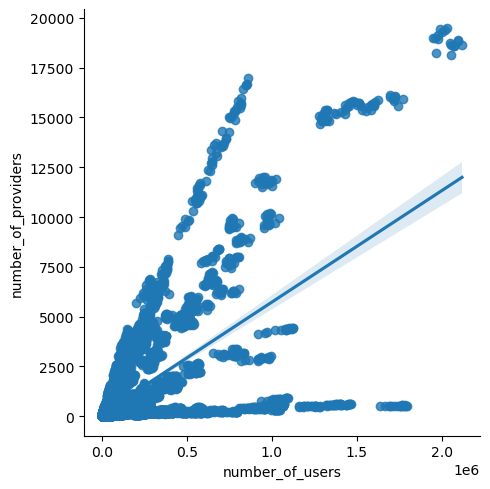

In [14]:
#create scatterplot for users vs providers
user_provider_scatter = sns.lmplot(x = 'number_of_users', y = 'number_of_providers', data = df_qpp)

Number of users and number of providers had the strongest positive correlation, which makes sense because the definition of a user in this dataset requires a member to have had a claim filed. In order to have claims filed, one must see a provider. However, the results are clustered on the low end (0,0)

In [15]:
#export scatterplot
user_provider_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'user_provider_scatter.png'))

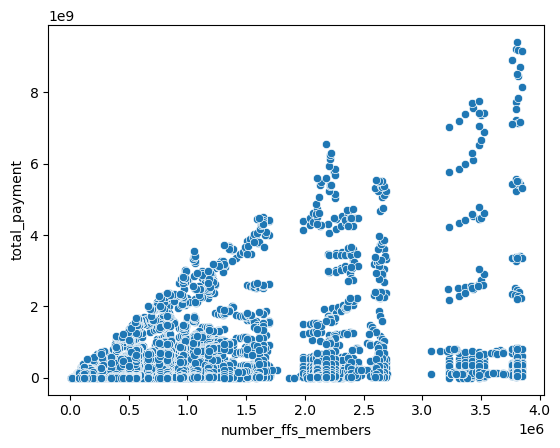

In [16]:
#create scatterplot for members vs payment
member_payment_scatter = sns.scatterplot(x = 'number_ffs_members', y = 'total_payment', data = df_qpp)

This scatterplot looks very similar to the first one. The values are still clustered towards the lower end.

In [17]:
#export scatterplot
member_payment_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'member_payment_scatter.png'))

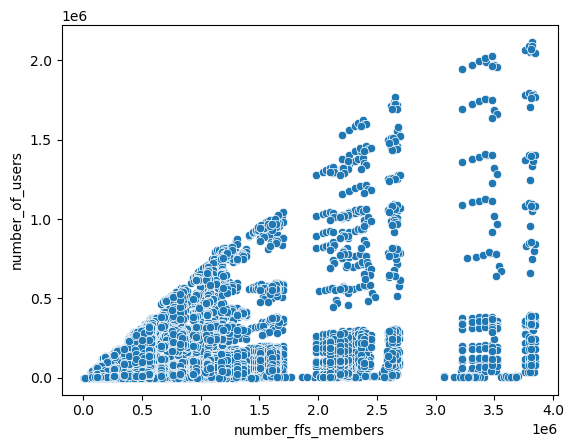

In [18]:
#create scatterplot for members vs users
member_user_scatter = sns.scatterplot(x = 'number_ffs_members', y = 'number_of_users', data = df_qpp)

This scatterplot looks similar to the first plot and the one above this. 

In [19]:
#export scatterplot
member_user_scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'member_user_scatter.png'))

## 04. Create pairplot

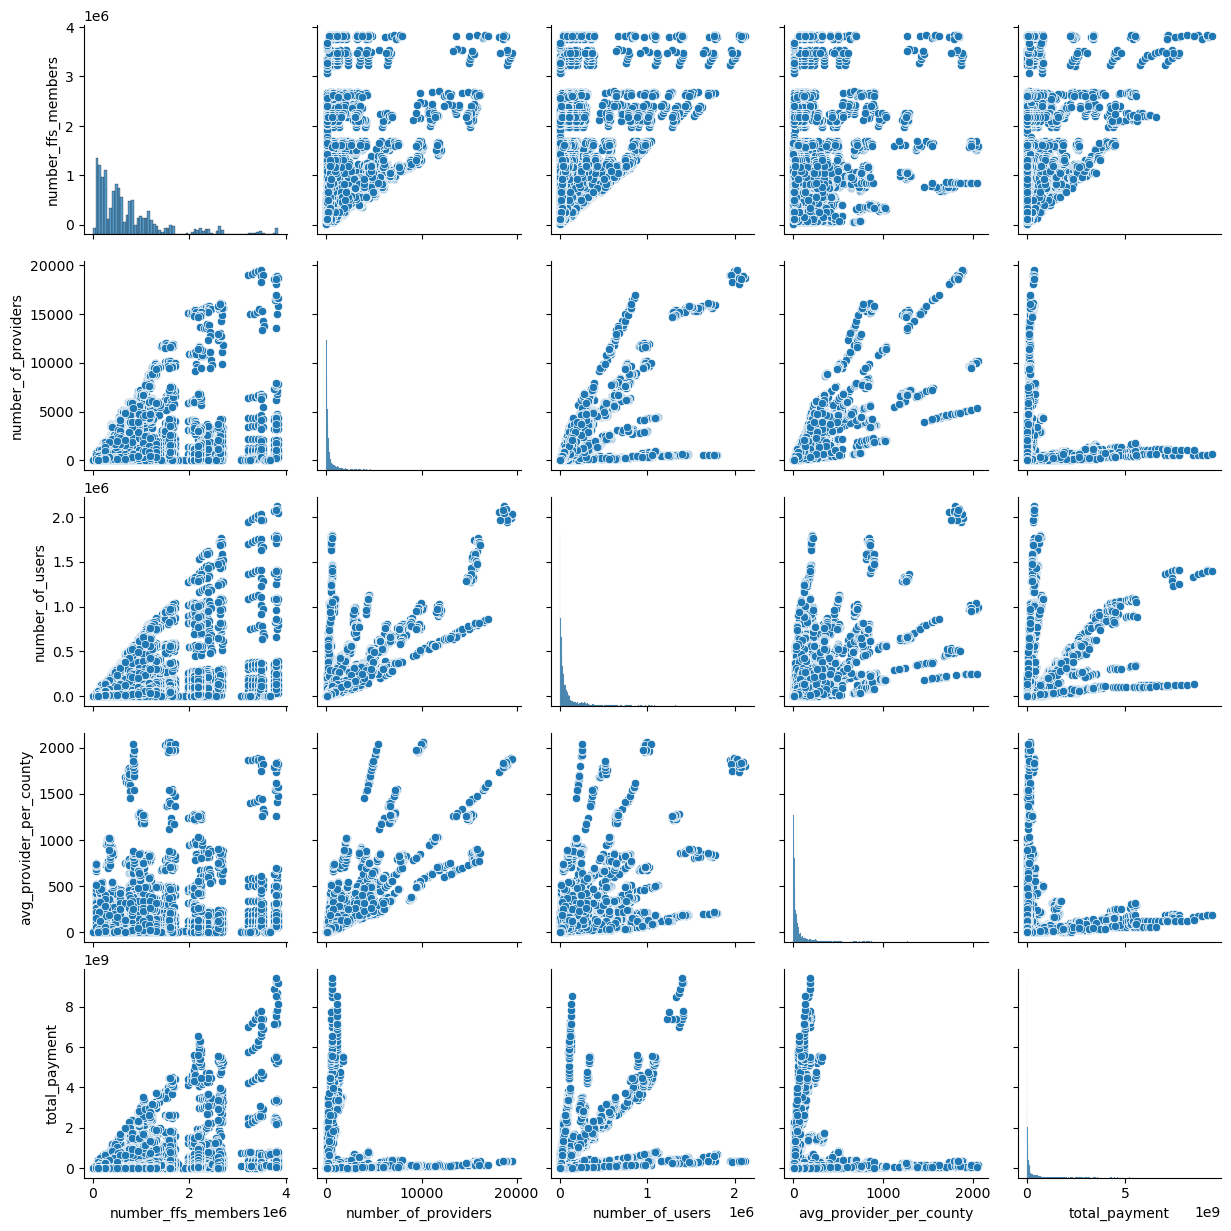

In [20]:
# create pair plot 
pair_plot = sns.pairplot(df_qpp)

In [21]:
#export pairplot
pair_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pairplot.png'))

## 05. Create categorical plot

<Axes: xlabel='total_payment', ylabel='Count'>

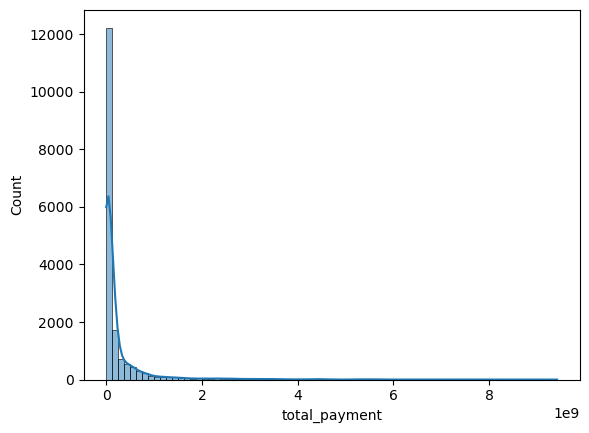

In [22]:
#create histogram of total_payment
sns.histplot(df_qpp['total_payment'], bins = 75, kde = True)

### A. Exploratory analysis for skew

In [23]:
df_qpp['total_payment'].mean()

252788671.78292406

In [24]:
df_qpp['total_payment'].median()

41963570.34

In [25]:
df_qpp['total_payment'].min()

1626.25

In [26]:
df_qpp['total_payment'].max()

9418765824.55

In [27]:
df_qpp.loc[df_qpp['total_payment'] > 10000000]

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,number_of_users,avg_provider_per_county,number_of_dual_eligible_users,total_payment,moratorium
1,2018,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,528819.0,149.0,497.2,74083.0,12.08,"27,907",7.676008e+07,No
3,2018,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,679296.0,176.0,376.38,66243.0,69.63,"13,476",4.592878e+07,No
4,2018,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,421631.0,89.0,597.22,53153.0,8.16,,4.777772e+07,No
5,2018,Ambulance (Emergency & Non-Emergency),STATE,CA,--ALL--,3228528.0,329.0,1143.47,376202.0,80.84,"177,350",3.354311e+08,No
6,2018,Ambulance (Emergency & Non-Emergency),STATE,CO,--ALL--,486851.0,136.0,324.34,44110.0,15.92,"12,255",3.312693e+07,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987460,2022,Telemedicine,STATE,MI,--ALL--,1082842.0,918.0,66.95,61461.0,87.95,"20,356",1.421092e+07,No
987468,2022,Telemedicine,STATE,NJ,--ALL--,1174303.0,859.0,70.49,60552.0,74.99,"13,003",1.377010e+07,No
987470,2022,Telemedicine,STATE,NY,--ALL--,2183802.0,1525.0,69.25,105599.0,127.58,"23,130",3.255841e+07,No
987476,2022,Telemedicine,STATE,PA,--ALL--,1606945.0,854.0,60.42,51595.0,51.38,"12,317",1.298730e+07,No


### B. Investigate the zero providers group

In [28]:
df_qpp.loc[df_qpp['number_of_providers'] == 0]

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,number_of_users,avg_provider_per_county,number_of_dual_eligible_users,total_payment,moratorium
35527,2018,Long-Term Care Hospitals,STATE,RI,--ALL--,55803.0,0.0,NaN,15.0,0.0,,1371312.32,No
35537,2018,Long-Term Care Hospitals,STATE,WY,--ALL--,26177.0,0.0,NaN,27.0,0.0,,2744110.36,No
55401,2018,Telemedicine,STATE,DC,--ALL--,62096.0,0.0,NaN,17.0,0.0,11,1626.25,No
93320,2018,Long-Term Care Hospitals,STATE,ME,--ALL--,29645.0,0.0,NaN,12.0,0.0,,893968.08,No
93340,2018,Long-Term Care Hospitals,STATE,RI,--ALL--,57430.0,0.0,NaN,18.0,0.0,,1278397.58,No
93350,2018,Long-Term Care Hospitals,STATE,WY,--ALL--,21330.0,0.0,NaN,30.0,0.0,,3222310.90,No
113220,2018,Telemedicine,STATE,DC,--ALL--,63552.0,0.0,NaN,22.0,0.0,12,1959.82,No
151243,2018,Long-Term Care Hospitals,STATE,ME,--ALL--,30082.0,0.0,NaN,14.0,0.0,,1017936.42,No
151263,2018,Long-Term Care Hospitals,STATE,RI,--ALL--,58831.0,0.0,NaN,19.0,0.0,,1248700.82,No
171151,2018,Telemedicine,STATE,CT,--ALL--,314408.0,0.0,NaN,91.0,0.0,38,44040.96,No


In [29]:
df_qpp['number_of_providers'].describe()

count    17291.000000
mean       704.127928
std       1762.804640
min          0.000000
25%         63.000000
50%        161.000000
75%        511.000000
max      19475.000000
Name: number_of_providers, dtype: float64

In [30]:
#create df with zero providers
zero_prov = df_qpp[df_qpp['number_of_providers'] == 0]

In [31]:
zero_prov.head()

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,number_of_users,avg_provider_per_county,number_of_dual_eligible_users,total_payment,moratorium
35527,2018,Long-Term Care Hospitals,STATE,RI,--ALL--,55803.0,0.0,NaN,15.0,0.0,,1371312.32,No
35537,2018,Long-Term Care Hospitals,STATE,WY,--ALL--,26177.0,0.0,NaN,27.0,0.0,,2744110.36,No
55401,2018,Telemedicine,STATE,DC,--ALL--,62096.0,0.0,NaN,17.0,0.0,11,1626.25,No
93320,2018,Long-Term Care Hospitals,STATE,ME,--ALL--,29645.0,0.0,NaN,12.0,0.0,,893968.08,No
93340,2018,Long-Term Care Hospitals,STATE,RI,--ALL--,57430.0,0.0,NaN,18.0,0.0,,1278397.58,No


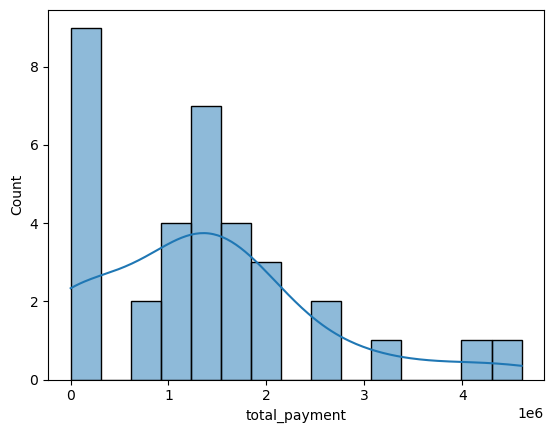

In [33]:
#create histogram of number_of_users with the zero provider subset
zero_prov_hist = sns.histplot(zero_prov['total_payment'], bins = 15, kde = True)

#this distribution appears to be a bit more normalized.

In [34]:
#export histogram
zero_prov_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'zero_provider_hist.png'))

### B. Investigate non-zero values for number of providers

In [35]:
nonzero_prov = df_qpp[df_qpp['number_of_providers'] > 0]
nonzero_prov['total_payment'].describe()

count    1.725700e+04
mean     2.532841e+08
std      6.789312e+08
min      1.506617e+04
25%      1.190556e+07
50%      4.221823e+07
75%      1.606934e+08
max      9.418766e+09
Name: total_payment, dtype: float64

<Axes: xlabel='total_payment', ylabel='Count'>

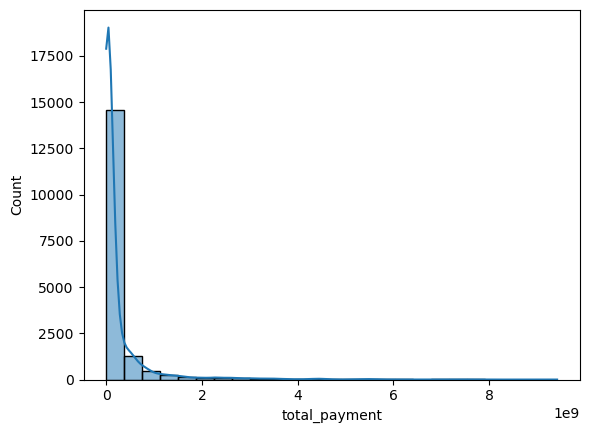

In [36]:
#create histogram of total_payment with the zero provider subset
sns.histplot(nonzero_prov['total_payment'], bins = 25, kde = True)

Another right skewed histogram with only one column. Will explore further.

<Axes: xlabel='number_of_users', ylabel='Count'>

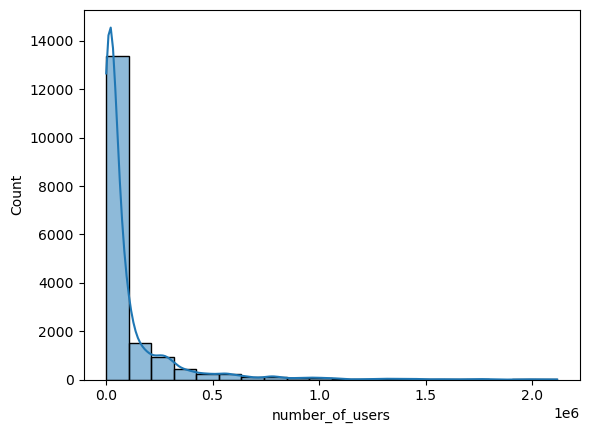

In [37]:
#create histogram of number_of_users with the nonzero provider subset
sns.histplot(nonzero_prov['number_of_users'], bins = 20, kde = True)

In [38]:
nonzero_prov.head()

,year,service_type,aggregation_level,state,county,number_ffs_members,number_of_providers,avg_user_per_provider,number_of_users,avg_provider_per_county,number_of_dual_eligible_users,total_payment,moratorium
1,2018,Ambulance (Emergency & Non-Emergency),STATE,AL,--ALL--,528819.0,149.0,497.2,74083.0,12.08,"27,907",7.676008e+07,No
2,2018,Ambulance (Emergency & Non-Emergency),STATE,AK,--ALL--,65846.0,32.0,212.88,6812.0,6.60,"2,824",5.690912e+06,No
3,2018,Ambulance (Emergency & Non-Emergency),STATE,AZ,--ALL--,679296.0,176.0,376.38,66243.0,69.63,"13,476",4.592878e+07,No
4,2018,Ambulance (Emergency & Non-Emergency),STATE,AR,--ALL--,421631.0,89.0,597.22,53153.0,8.16,,4.777772e+07,No
5,2018,Ambulance (Emergency & Non-Emergency),STATE,CA,--ALL--,3228528.0,329.0,1143.47,376202.0,80.84,"177,350",3.354311e+08,No


In [39]:
nonzero_prov['total_payment'].describe()

count    1.725700e+04
mean     2.532841e+08
std      6.789312e+08
min      1.506617e+04
25%      1.190556e+07
50%      4.221823e+07
75%      1.606934e+08
max      9.418766e+09
Name: total_payment, dtype: float64

In [40]:
nonzero_prov.loc[(nonzero_prov['total_payment'] >= 22000) & (nonzero_prov['total_payment'] <= 12000000), 'payment category'] = 'low payment'

/var/folders/2d/wsjd0mc13vl4q6p45np_hyx00000gn/T/ipykernel_8015/2603965325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonzero_prov.loc[(nonzero_prov['total_payment'] >= 22000) & (nonzero_prov['total_payment'] <= 12000000), 'payment category'] = 'low payment'


In [41]:
nonzero_prov.loc[(nonzero_prov['total_payment'] > 12000000) & (nonzero_prov['total_payment'] <= 42000000), 'payment category'] = 'low-moderate payment'

In [42]:
nonzero_prov.loc[(nonzero_prov['total_payment'] > 42000000) & (nonzero_prov['total_payment'] <= 161000000), 'payment category'] = 'moderate-high payment'

In [43]:
nonzero_prov.loc[(nonzero_prov['total_payment'] > 161000000), 'payment category'] = 'high payment'

In [44]:
nonzero_prov['payment category'].value_counts(dropna = False)

low payment              4334
moderate-high payment    4332
high payment             4310
low-moderate payment     4275
NaN                         6
Name: payment category, dtype: int64

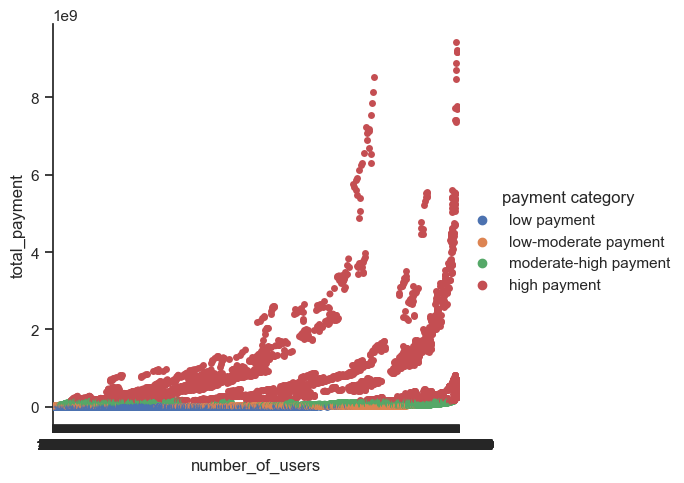

In [40]:
#create categorical plot
sns.set(style='ticks')
catplot = sns.catplot(x = 'number_of_users', y = 'total_payment', hue='payment category', data = nonzero_prov)

The high payments are clustered toward the lower number of user end, rather than higher.

In [ ]:
#export catplot
catplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'catplot.png'))

Potential hypotheses:
- If total payments are higher with less users, then there is a higher likelihood of FWA (fraud,waste,abuse), i.e. billing more unncessary, expensive services
- If there are lot of users and less providers, then that area is likely to be undersaturated.